In [1]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt

# 6.1

In [2]:
# a
# all in centimeters
W = 50E-4
L = 2E-4
Tox = 5E-7
Q = q*8E10

# 15 P-type, using graph 2-8
Na = 1E15
vfb = find_Vfb(1E15, doping=Doping.N_to_P)

print(f"Vfb = {vfb}")



Vfb = -0.8575250401059726


In [3]:
# b
vt0 = find_Vt(Na, l=Tox)
print(f"Vt0 = {vt0}")

Cox = cap(si_di, Tox)

print(f"Cox = {Cox}")



Vt0 = -0.24203416509966288
Cox = 2.0886000000000002e-06


### C
To increase Vt, and we can't increase Cox length, then the only other thing we can change is the doping of the P substrate with more acceptors, like Boron.  To do this we can use Ion implantation or CVD

In [4]:
aerr = .0001
cur_Vt = 0
perror = lambda E, A:(E - A)/A

Na_iter = 1E15
er = 1
Vt = .5
ind = 0
print_num = 10000
dn = 1E15
# not optimal but works
while(np.abs(er) > aerr):
    cur_Vt = find_Vt(Na_iter, l=Tox)
    er = -perror(cur_Vt, Vt)
    Na_iter += dn*er
    ind += 1

print(f"new Vt = {cur_Vt}")
print(f"new Na = {Na_iter}")
print(f"Na inc = {np.log10(Na_iter) - np.log10(Na)}")

new Vt = 0.49995004109925145
new Na = 5.547045862565989e+17
Na inc = 2.744061756608417


So we want to increase the doping by 1E2 or 1E3 

# 6.3
### a b and c

In [5]:
Tgox = 5E-7
Na = 6E17
Nd = 6E17

# a, b and c
Vta = find_Vt(Na, l=Tgox, doping=Doping.N_to_P)
Vtb = find_Vt(Na, l=Tgox, doping=Doping.N_to_N)
Vtc = find_Vt(Na, l=Tgox, doping=Doping.P_to_N) 

print(f"Vta = {Vta}")
print(f"Vtb = {Vtb}")
print(f"Vtc = {Vtc}")


Vta = 0.5273305414618078
Vtb = -1.647330541461808
Vtc = -0.5273305414618078


### d

Vth, Vsb = 0: 0.5273305414618078
Vth, Vsb = 2.55: 1.1129254251799328


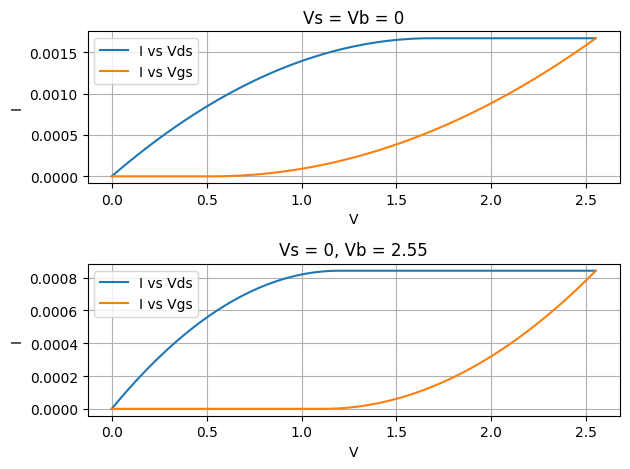

In [6]:
# d
Vdd = 2.55
samples = 100

V = np.linspace(0, Vdd, samples)
WdL=1

# Bands would be going from metal to a P substrate
vta = find_Vth(find_gamma(Nd, Tgox), find_Vt(Nd, Tgox, doping=Doping.N_to_P), Nd, 0)
vtb = find_Vth(find_gamma(Nd, Tgox), find_Vt(Nd, Tgox, doping=Doping.N_to_P), Nd, 2.55)

print(f"Vth, Vsb = 0: {vta}")
print(f"Vth, Vsb = 2.55: {vtb}")
Ivdsa = list(map(lambda v : find_Ids(WdL, si_un, 2.55, 0, v, vta, t=Tgox),V))
Ivgsa = list(map(lambda v : find_Ids(WdL, si_un, v, 0, 2.55, vta, t=Tgox),V))

Ivdsb = list(map(lambda v : find_Ids(WdL, si_un, 2.55, 0, v, vtb, t=Tgox),V))
Ivgsb = list(map(lambda v : find_Ids(WdL, si_un, v, 0, 2.55, vtb, t=Tgox),V))
plt.figure()
plt.subplot(2,1,1)
plt.title("Vs = Vb = 0")
plt.plot(V, Ivdsa, label="I vs Vds")
plt.plot(V, Ivgsa, label="I vs Vgs")
plt.grid()
plt.ylabel("I")
plt.xlabel("V")
plt.legend()
plt.subplot(2,1,2)
plt.title("Vs = 0, Vb = 2.55")
plt.plot(V, Ivdsb, label="I vs Vds")
plt.plot(V, Ivgsb, label="I vs Vgs")
plt.grid()
plt.ylabel("I")
plt.xlabel("V")
plt.legend()
plt.tight_layout()
plt.show()

As seen above, we want $V_{sb}$ to be zero as it lowers the threshold voltage.  Also we want $V_{ds}$ and $V_{gs}$ to be 2.5V as that allows for highest $V_{sd}$ 

### e

Vth, Vsb = 0: -1.647330541461808
Vth, Vsb = 2.55: -2.232925425179933


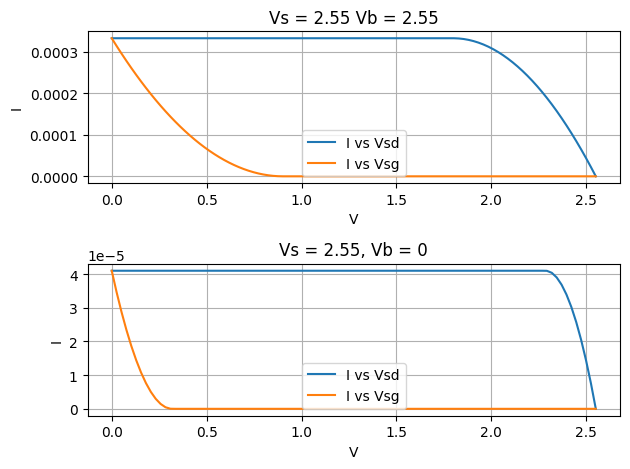

In [7]:
# e
Vdd = 2.55
samples = 100

V = np.linspace(0,Vdd, samples)
WdL=1

# Bands would be going from metal to a P substrate
vta = find_Vth(find_gamma(Nd, Tgox), find_Vt(Na, Tgox, doping=Doping.N_to_N), Na, 0)
vtb = find_Vth(find_gamma(Nd, Tgox), find_Vt(Na, Tgox, doping=Doping.N_to_N), Na, 2.55)

# I am just going make V negitive as instead of everything being drain to source, its easier to look
# at source to drain
print(f"Vth, Vsb = 0: {vta}")
print(f"Vth, Vsb = 2.55: {vtb}")
Ivdsa = list(map(lambda v : find_Isd(WdL, si_un, 0, 2.55, v, vta, t=Tgox),V))
Ivgsa = list(map(lambda v : find_Isd(WdL, si_un, v, 2.55, 0, vta, t=Tgox),V))

Ivdsb = list(map(lambda v : find_Isd(WdL, si_un, 0, 2.55, v, vtb, t=Tgox),V))
Ivgsb = list(map(lambda v : find_Isd(WdL, si_un, v, 2.55, 0, vtb, t=Tgox),V))
plt.figure()
plt.subplot(2,1,1)
plt.title("Vs = 2.55 Vb = 2.55")
plt.plot(V, Ivdsa, label="I vs Vsd")
plt.plot(V, Ivgsa, label="I vs Vsg")
plt.grid()
plt.ylabel("I")
plt.xlabel("V")
plt.legend()
plt.subplot(2,1,2)
plt.title("Vs = 2.55, Vb = 0")
plt.plot(V, Ivdsb, label="I vs Vsd")
plt.plot(V, Ivgsb, label="I vs Vsg")
plt.grid()
plt.ylabel("I")
plt.xlabel("V")
plt.legend()
plt.tight_layout()
plt.show()

Set $V_{sb}$ = 0 (but s =2.5 and b=2.5) still and then set $V_{sg}$ to 0 and set $V_{ds}$ to 2.5

### f

In [8]:
# f

vtb = find_Vth(find_gamma(Na, Tgox), find_Vt(Na, Tgox, doping=Doping.N_to_N), Na, 0)
vtc = find_Vth(find_gamma(Na, Tgox), find_Vt(Na, Tgox, doping=Doping.P_to_N), Na, 0)

Vsg = 2.5
Ib = find_Idsat(1, 1, 1, -Vsg, vtb)
Ic = find_Idsat(1, 1, 1, -Vsg, vtc)
print(f"Vthb = {vtb}")
print(f"Isatb = {Ib}")
print(f"Vthc = {vtc}")
print(f"Isatc = {Ic}")
print(f"Ic/Ib: {Ic/Ib}")


Vthb = -1.647330541461808
Isatb = 0.30293550230158894
Vthc = -0.5273305414618078
Isatc = 1.621426996937235
Ic/Ib: 5.352383542431469


The P-Gate P-type Mosfet with the higher threshold voltage will have a higer current if a negitive voltage is applied between the gate and source.  

### g

In [9]:
# g
Vsg = 2.5
Vtc = find_Vth(find_gamma(Na, Tgox), find_Vt(Na, Tgox, doping=Doping.P_to_N), Na, 0)
Vta = find_Vt(Na, l=Tgox, doping=Doping.N_to_P)


sm = (2.5 + Vta + .2)/(6*Tgox)
print(f"N ={sm}")
un = 225
sm = -(-2.5 + 1.5*Vtc - .25)/(6*Tgox)
print(f"P ={sm}")
up = 50

Ia = find_Idsat(1, 1, un, Vsg, Vta)
Ic = find_Idsat(1, 1, up, -Vsg, Vtc)

print(f"Ia = {Ia}")
print(f"Ic = {Ic}")
print(f"Ic/Ia = {Ic/Ia}")

N =1075776.847153936
P =1180331.9373975706
Ia = 364.82107431087786
Ic = 81.07134984686176
Ic/Ia = 0.22222222222222227


# 6.5
### a
$V_{th}$ = 1
### b




In [10]:
W = 10E-4
L = 2E-4
Tox = 10E-7

u = solve_iteration(2.8E-3, 2, 10, .0001, find_Idsat, W/L, cap(siO2_di, Tox), 100, 4, 1)
print(f"un = {u}")

Vds = np.linspace(0, 5, 100)
I4 = list(map(lambda v : find_Ids(W/L, u, 4, 0, v, 1, t=Tox)*1E3,Vds))
I3 = list(map(lambda v : find_Ids(W/L, u, 3, 0, v, 1, t=Tox)*1E3,Vds))
I2 = list(map(lambda v : find_Ids(W/L, u, 2, 0, v, 1, t=Tox)*1E3,Vds))



un = 432.62022184627006


### c

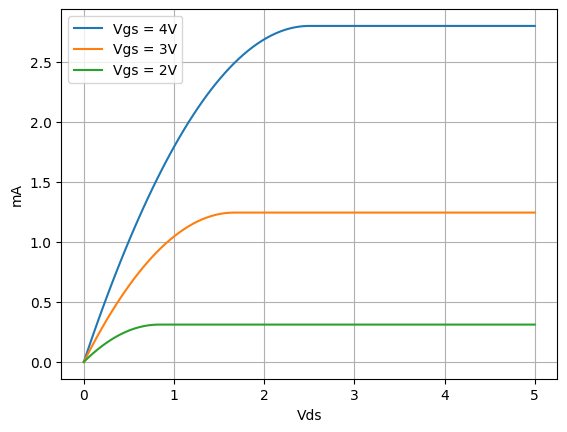

In [11]:
plt.figure()
plt.plot(Vds, I4, label = "Vgs = 4V")
plt.plot(Vds, I3, label = "Vgs = 3V")
plt.plot(Vds, I2, label = "Vgs = 2V")
plt.grid()
plt.ylabel("mA")
plt.xlabel("Vds")
plt.legend()
plt.show()

# 6.17
### a

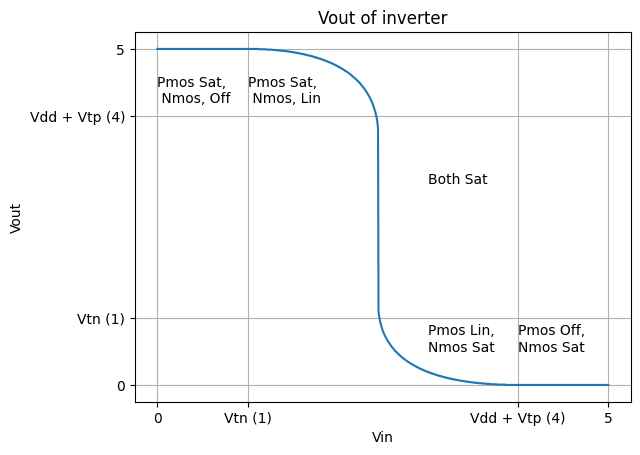

In [12]:
Vtn = 1
Vtp = -1

# I am just combinding mobility and Cox into WdL
un = 1
Cox = 1
WdLuCn = 40E-3
WdLuCp = 35E-3
Rt = 1
# netlist
Vdd = 5
Vout = 0
Vin = np.linspace(0, Vdd, 1000)
dv = Vdd/400
gnd = 0
Rt = 1E9

VddpVtp = Vdd+Vtp

# inverter

Vo = np.zeros(len(Vin))

ind = 0
critical_values = []
for v in Vin:


    if v < Vtn and v < -Vtp:
        Vo[ind] = Vdd
        Vout = Vdd
    elif v > Vtn and Vdd - v < -Vtp:
        Vo[ind] = 0
        Vout = 0
    else:
        Ipg = list(map(lambda vip: find_Isd(WdLuCp, un, v, Vdd, vip, Vtp, cox=Cox), Vin))
        Ing = list(map(lambda vip: find_Ids(WdLuCn, un, v, 0, vip, Vtn, cox=Cox), Vin))
        cI = np.abs(Ipg[0] - Ing[0])
        Vout = 0
        for i in range(len(Ipg)):
            if np.abs(Ipg[i] - Ing[i]) < cI:
                Vout = Vin[i]
                cI = np.abs(Ipg[i] - Ing[i])
        Vo[ind] = Vout

    ind += 1



plt.figure()
plt.plot(Vin, Vo)
plt.grid()
plt.title("Vout of inverter")
plt.ylabel("Vout")
plt.xlabel("Vin")
plt.yticks([0, Vtn, Vdd+Vtp, Vdd], [0, f"Vtn ({Vtn})", f"Vdd + Vtp ({VddpVtp})", Vdd])
plt.xticks([0, Vtn, Vdd+Vtp, Vdd], [0, f"Vtn ({Vtn})", f"Vdd + Vtp ({VddpVtp})", Vdd])
plt.text(0, 4.2, "Pmos Sat,\n Nmos, Off")
plt.text(1, 4.2, "Pmos Sat,\n Nmos, Lin")
plt.text(3, 3, "Both Sat")
plt.text(3, .5, "Pmos Lin,\nNmos Sat")
plt.text(4, .5, "Pmos Off,\nNmos Sat")
plt.show()



### b

In [13]:
VddpVtpy = ytox(VddpVtp, Vo, Vin)
Vtny = ytox(Vtn, Vo, Vin)
VddpVtpx = xtoy(VddpVtp, Vo, Vin)
Vtnx = xtoy(Vtn, Vo, Vin)

print(f"Vout = {VddpVtp}, Vin = {VddpVtpy}")
print(f"Vout = {Vtn}, Vin = {Vtny}")
print(f"Vin = {VddpVtp}, Vout = {VddpVtpx}")
print(f"Vin = {Vtn}, Vout = {Vtnx}")

Vout = 4, Vin = 2.4274274274274275
Vout = 1, Vin = 2.4624624624624625
Vin = 4, Vout = 0.0
Vin = 1, Vout = 5.0


# Referances

Supporting code:
https://github.com/Brandon-Vetter/semiconductor_functions/blob/main/functions.py